## Slide Desk Report on Analytics of MoH Breast Cancer  Data

## Research Overview

> The primary goal of this research is to perform an Exploratory and Explanatory Data Analytics on Breast Cancer dataset in order to get insights on the relationship among breast cancer attributes.

## Dataset Overview
> The dataset used in this research was collected from Ministry of Health, King Fahd Medical City Hospital, Saudi Arabia.
The dataset include patient age, cancer type, grade, breast density, breast imaging reporting and data system (BIRADS) among others. It contains 521 instances and 16 features.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# sb.set(style='darkgrid')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Read the MoH Breast Cancer Dataset into a DataFrame, aslo drop the first colum
breast_cancer_df = pd.read_csv('moh_breast_cancer_data.csv', index_col=0)
breast_cancer_df.reset_index(drop=True, inplace=True)

In [3]:
breast_cancer_df.shape

(521, 15)

In [4]:
# Normalise the column labels
breast_cancer_df.columns = breast_cancer_df.columns.str.replace(" ", "_").str.replace("p","P").str.replace(".", "_").str.lower()


In [5]:
breast_cancer_df['grade'] = breast_cancer_df['grade'].replace('I-II', 'III').replace('2l3', 'III').replace('1l3', 'III').replace('IIII', 'III')


In [6]:
# Replace all accorence of p with P
breast_cancer_df['calcification'] = breast_cancer_df['calcification'].replace('p', 'P')

In [7]:
"""
Columns that are not needed will be dropped, 
as some columns deal with surgry or perhaps really not relevant to the analysis.
Columns to be dropped are: markers, size_us_(list), size_surgry, ln, l_ctomy, m_tomy
""" 
breast_cancer_df.drop(['markers', 'size_us_(list)',
                       'size_surgry', 'ln', 'l_ctomy', 'm_tomy', 'stages_(list)'], axis=1, inplace=True)
                       

In [8]:
# rename column label that are not descriptive 
breast_cancer_df.rename(columns = {'c_type':'type', 'm_tomy':'mastectomy','l_ctomy':'lumpectomy','size_us_(list)':'ultrasound_size', 'size_surgry':'surgry_size', 'ln':'lymph_node', 'us':'ultrasound' }, inplace = True)

In [9]:
# Drop all NULL values 
breast_cancer_df.dropna(subset = ['age', 'breast_density', 'calcification', 'type'], inplace=True)

In [10]:
# Convert age datatype from float to int
breast_cancer_df['age'] = breast_cancer_df['age'].astype(int)

In [11]:
# Function to plot variables distribution graph
def distribution_plot(dataframe, column_name,bins_base):
    column_name_counts = dataframe[column_name].value_counts()
    plot=plt.hist(data=dataframe,x=column_name,bins=bins_base)
    return(plot)

# Function to plot virtical bar
def count_plot(dataframe,column_name, xlabel="", ylabel=""):
    base_color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,x=column_name,color=base_color,order=column_name_count.index);
    return(plot)

# Function to plot horizontal bar
def count_plot_horizontal(dataframe,column_name, xlabel="", ylabel=""):
    base_color=sb.color_palette()[0]
    column_name_count=dataframe[column_name].value_counts()
    plot=sb.countplot(data=dataframe,y=column_name,color=base_color,order=column_name_count.index);
    return(plot)


In [12]:
breast_cancer_df_clean = breast_cancer_df.copy()

### Age Distribution of The Patients
>The data revealed that the maximum age of the patients is 84 years old, the minimum age is 31 years old, while the average age is 53 years old.<br>
With the majority of the patients beign between 50 and 60 years old and the least beign 31 years old, one could perhaps conclude that breast cancer rarely affect women that are less than 30 years old, perhaps considering the location under study.


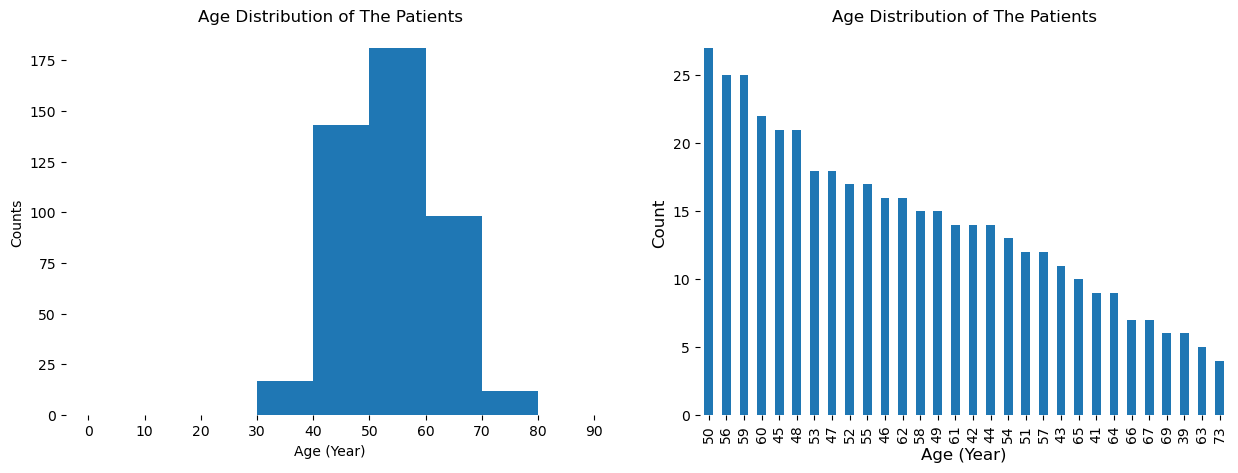

In [13]:
#  age distribution
plt.figure(figsize = [15, 5])
bins_base = np.arange(0, breast_cancer_df_clean['age'].max(), 10)

plt.subplot(1,2,1)
distribution_plot(breast_cancer_df_clean,'age', bins_base)
plt.title("Age Distribution of The Patients")
plt.xlabel("Age (Year)")
plt.ylabel("Counts")
plt.xticks(np.arange(0, breast_cancer_df_clean['age'].max()+10, 10));
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.subplot(1,2,2)

# base_color=sb.color_palette()[0]
base_order = breast_cancer_df_clean.value_counts().index
breast_cancer_df_clean.age.value_counts().head(30).plot(kind='bar');
plt.title("Age Distribution of The Patients", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Age (Year)", fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    

### Age Distribution of The Patients
>The data revealed that the maximum age of the patients is 84 years old, the minimum age is 31 years old, while the average age is 53 years old.<br>
With the majority of the patients beign between 50 and 60 years old and the least beign 31 years old, one could perhaps conclude that breast cancer rarely affect women that are less than 30 years old, perhaps considering the location under study.


In [14]:
# Percentage distribution of cancer stage
(breast_cancer_df_clean.stage.value_counts().head(10)/breast_cancer_df_clean.shape[0] * 100).round(2)

T1N0M0    36.56
T2N0M0    13.66
T2N1M0    11.45
T3N1M0     9.47
T3N0M0     7.27
T1N1M0     3.96
T4N1M0     2.86
T0N0M0     1.98
T2N2M0     1.76
T2N1M1     1.32
Name: stage, dtype: float64

##  Cancer Stage Distribution of The Patients
> T1N0M0 is the major breast cancer stage exhibited by the patients, 36.56% of the patients belong to this satge, followed by T2N0M0 and T2N1M0 with 13.66% and 11.45% respectively.
For the majority of the patients to belong to the early-stage primary pulmonary adenocarcinoma (T1N0M0), one can deduce that potential breast cancer patients do go for a early test to know their status, this could be associated with breast cancer sensitisation and awareness in the area under study.

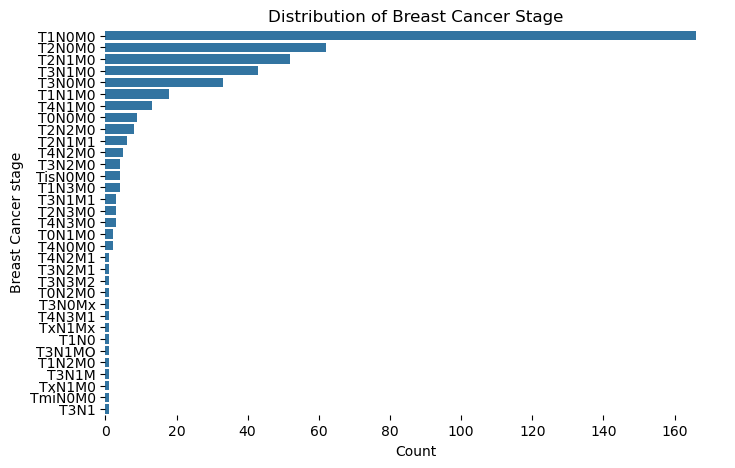

In [15]:
plt.figure(figsize=(8,5)) 
#  Call the `count_plot_horizontal` function
count_plot_horizontal(breast_cancer_df_clean, 'stage')
plt.title ("Distribution of Breast Cancer Stage")
plt.ylabel("Breast Cancer stage")
plt.xlabel("Count")

for spine in plt.gca().spines.values():
    spine.set_visible(False)


## Cancer Grade Distribution of The Patients 
> Breast cancer grade II appears to be the major cancer grade exhibited by the patients as 61.89% of them belong to this grade, follwoed by cancer grade III with 29.96%, and cancer grade I with 8.15%.<br>
Th breast cancer grade II implies that the cancer has grown, but hasn't spread. For the percentage of the patients to have reduced to 32% from cancer grade II to cancer grade III, one can analytically say that there is a huge positive result in the cancer treatments. 

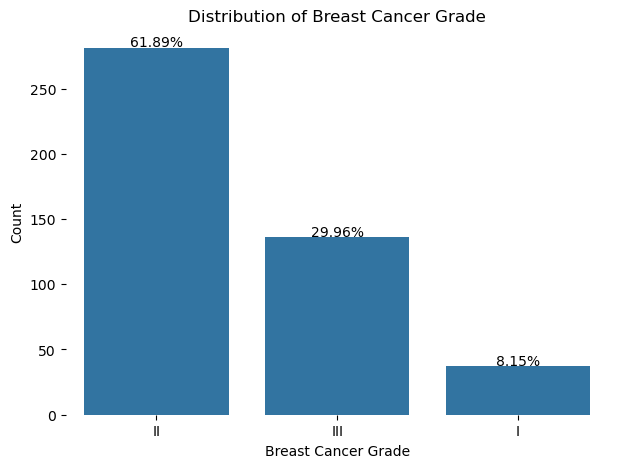

In [16]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(7,5)) 
ax = sb.countplot(data=breast_cancer_df_clean, x='grade', color=base_color);

pct = []
for i in ax.patches:
    pct.append(i.get_height())
    
percentage_sum = sum(pct)
for i in ax.patches:
    val = i.get_height()
    
# Calculate the percentage for each bar
    percentage = (val/percentage_sum) * 100
    ax.text(i.get_x() + i.get_width()/2., val + 1, f'{percentage:.2f}%', ha='center')
    
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Distribution of Breast Cancer Grade")
plt.xlabel('Breast Cancer Grade')
plt.ylabel('Count')

plt.show()         

## Distribution of Breast Imaging Reporting and Data System (BIRADS)
> The data revealed that 53.30% of the patients fall under BIRADS category 0, which implies an imcomplete test, that is, additional imaging evaluation and/or comparison to prior mammograms (or other imaging tests) is needed to ascertain the beast cancer status. While, 42.73% of the patients fall in BIRADS category V.

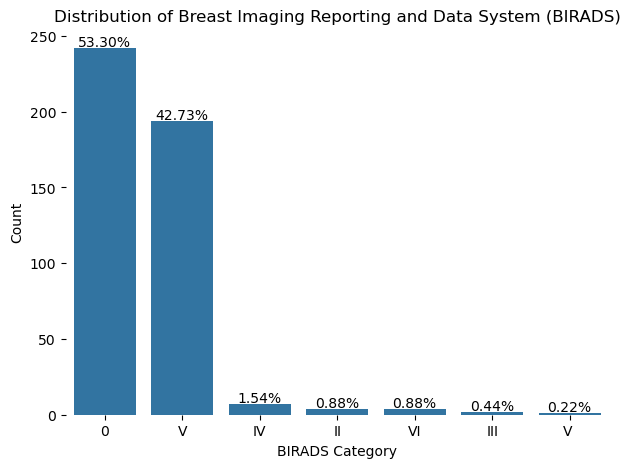

In [17]:
base_color = sb.color_palette()[0]
base_order = breast_cancer_df_clean.birads.value_counts().index
plt.figure(figsize=(7,5)) 
ax = sb.countplot(data=breast_cancer_df_clean, x='birads', color=base_color, order=base_order);

pct = []
for i in ax.patches:
    pct.append(i.get_height())
    
percentage_sum = sum(pct)
for i in ax.patches:
    val = i.get_height()
    
# Calculate the percentage for each bar
    percentage = (val/percentage_sum) * 100
    ax.text(i.get_x() + i.get_width()/2., val + 1, f'{percentage:.2f}%', ha='center')
    
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Distribution of Breast Imaging Reporting and Data System (BIRADS)")
plt.xlabel('BIRADS Category')
plt.ylabel('Count')

plt.show()  

## Cancer Type Distribution of The Patients
> The data revealed that 41.51% of the patient exhibited both Invasive Ductal Carcinoma and Ductal Carcinoma In Situ Component (IDC + DCIS) cancer type, while 36.47% of them have only Invasive Ductal Carcinoma (IDC) cancer type.  This implies that each of this breast cancer type can often be present alone or co-exist with each other as IDC + DCIS. Only 4.13% of the patients have Invasive Lobular Carcinoma (ILC) type.

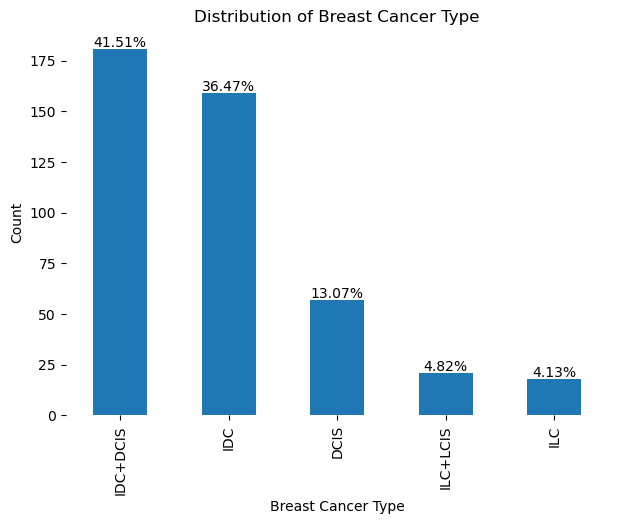

In [18]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(7,5)) 
ax =  breast_cancer_df_clean.type.value_counts().head(5).plot(kind='bar');
# ax = sb.countplot(data=breast_cancer_df_clean, x='type', color=base_color);

pct = []
for i in ax.patches:
    pct.append(i.get_height())
    
percentage_sum = sum(pct)
for i in ax.patches:
    val = i.get_height()
    
# Calculate the percentage for each bar
    percentage = (val/percentage_sum) * 100
    ax.text(i.get_x() + i.get_width()/2., val + 1, f'{percentage:.2f}%', ha='center', fontsize=10)
    
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Distribution of Breast Cancer Type")
plt.xlabel('Breast Cancer Type')
plt.ylabel('Count')

plt.show()  

## Correlation Among All The variables
> Positive correlations were observed between cancer grade and stage, birads and stage, type and ultrasound. It appears that age is nagatively correlated with cancer stage, grade, breast density and calcification, but positively correlated with cancer type, ultrasound and birads. However, the correlations as either positive or negative are both at minimal levels, which further confirmed the fact that age is not a strong determinant of breast cancer stage, type, grade or breast density. 

In [19]:
# Convert features to categorical datatype
breast_cancer_df_clean['type']=breast_cancer_df_clean['type'].astype('category').cat.codes
breast_cancer_df_clean['stage']=breast_cancer_df_clean['stage'].astype('category').cat.codes
breast_cancer_df_clean['breast_density']=breast_cancer_df_clean['breast_density'].astype('category').cat.codes
breast_cancer_df_clean['birads']=breast_cancer_df_clean['birads'].astype('category').cat.codes
breast_cancer_df_clean['grade']=breast_cancer_df_clean['grade'].astype('category').cat.codes
breast_cancer_df_clean['calcification']=breast_cancer_df_clean['calcification'].astype('category').cat.codes
breast_cancer_df_clean['ultrasound']=breast_cancer_df_clean['ultrasound'].astype('category').cat.codes

In [20]:
breast_cancer_df_clean.corr()

,age,breast_density,birads,ultrasound,calcification,type,stage,grade
age,1.000000,-0.211828,0.031027,0.011674,-0.092027,0.075283,-0.035943,-0.175667
breast_density,-0.211828,1.000000,0.046817,0.044177,0.015915,0.052856,0.113375,0.013815
birads,0.031027,0.046817,1.000000,0.246886,0.110918,0.037890,0.171003,0.074637
ultrasound,0.011674,0.044177,0.246886,1.000000,0.013190,0.112405,0.118579,0.020352
calcification,-0.092027,0.015915,0.110918,0.013190,1.000000,-0.205844,-0.029551,-0.058195
type,0.075283,0.052856,0.037890,0.112405,-0.205844,1.000000,0.169909,-0.036214
stage,-0.035943,0.113375,0.171003,0.118579,-0.029551,0.169909,1.000000,0.191466
grade,-0.175667,0.013815,0.074637,0.020352,-0.058195,-0.036214,0.191466,1.000000


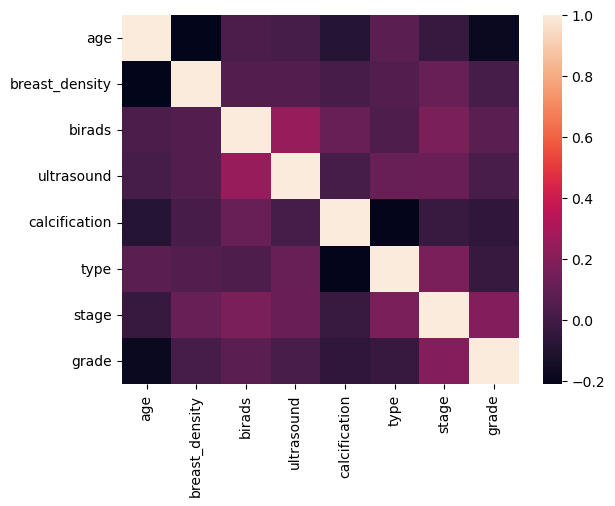

In [21]:
# Visualize the correlations among the varibles.
sb.heatmap(breast_cancer_df_clean.corr());

## KEY INSIGHTS
After an In-depth analysis, the following insights were revealed by the data.
> - Breast cancer rarely affect women below the age of 30.
> - The most vulnerable age group of breast cancer is between 50 - 60 years old.
> - Majority of the patients belong to the early-stage primary pulmonary adenocarcinoma (T1N0M0) cancer stage, which signifies the chances of the patients having an early breast cancer test.
> - 61.89% of the patients fall under cancer grade II, while only 29.96% of them fall under cancer grade III, the 32% reduction of patients from cancer grade II to cancer grade III signifies a posible positive response to breast cancer treatments.
> - There is a positive correlations between cancer grade and stage, birads and stage, while a  negative correlations were also observed between age and cancer stage, grade and breast density. 

In [ ]:
!jupyter nbconvert Slide-Desk-Report-on-Analytics-of-MoH-Breast-Cancer-Data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Slide-Desk-Report-on-Analytics-of-MoH-Breast-Cancer-Data.ipynb to slides
[NbConvertApp] Writing 810098 bytes to Slide-Desk-Report-on-Analytics-of-MoH-Breast-Cancer-Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Slide-Desk-Report-on-Analytics-of-MoH-Breast-Cancer-Data.slides.html
Use Control-C to stop this server
